In [1]:
#import libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [2]:
# loading Iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:

# presenting features and labels
print(f'features: {iris.feature_names}\nlabels: {iris.target_names}')


features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels: ['setosa' 'versicolor' 'virginica']


In [5]:
#seprating features and labels and converting to data frame
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [22]:
#applying Kmeans to our dataset
from sklearn.cluster import KMeans
inert = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 64)
    kmeans.fit(x)
    inert.append(kmeans.inertia_) 

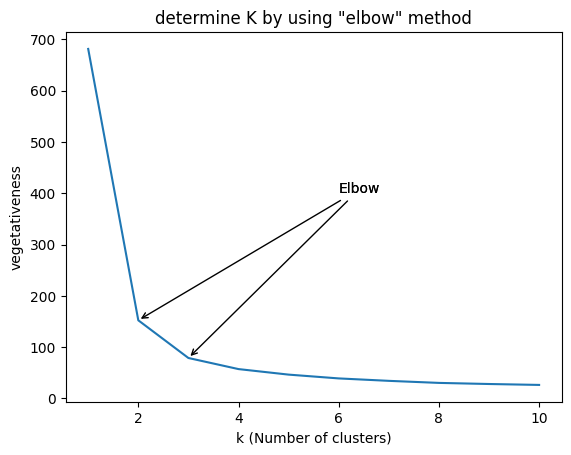

In [24]:
plt.plot(range(1, 11), inert)
plt.title('determine K by using "elbow" method')
plt.xlabel('k (Number of clusters)')
plt.ylabel('vegetativeness') 
plt.annotate("Elbow", xy=(2, inert[1]), xytext=(6, 400),arrowprops=dict(arrowstyle="->"))
plt.annotate("Elbow", xy=(3, inert[2]), xytext=(6, 400),arrowprops=dict(arrowstyle="->"))
plt.show()

In [25]:
from kneed import KneeLocator
kloc = KneeLocator(range(1, 11), inert, curve="convex", direction="decreasing")
print(f'Based on the elbow method the optimal number of clusters is: {kloc.elbow}')

Based on the elbow method the optimal number of clusters is: 3


In [26]:
# αλγόριθμος k means με k = 3
km = KMeans(n_clusters=3, n_init = 10, random_state=30)
labels_kmeans = km.fit_predict(x)
print(labels_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [28]:
# precision calculation
acc = sm.accuracy_score(y,labels_kmeans)
print(f'The precision of k-means is equal to: {round(acc,4)}')

The precision of k-means is equal to: 0.44


Text(0.5, 23.52222222222222, 'Predicted label by k-means')

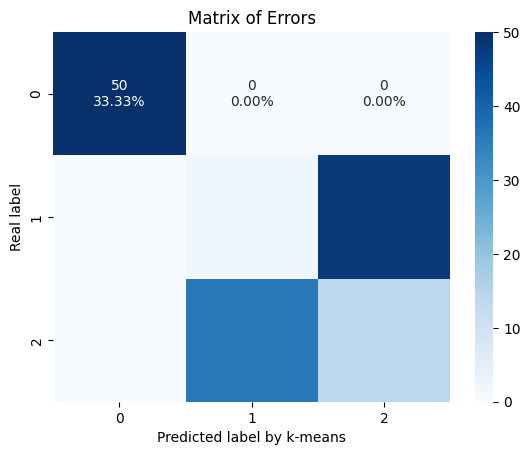

In [21]:
# error matrix
import seaborn as sns
matrix = sm.confusion_matrix(y,labels_kmeans)

group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.title('Matrix of Errors')
plt.ylabel('Real label')
plt.xlabel('Predicted label by k-means')